# 고유값, 고유벡터

정사각형 행렬 A에 대하여 Av = λv(λ는 상수)가 성립하는 0이 아닌 벡터 v가 존재 할 때 상수 λ를 A의 __고유값(eigenvalue)__ , 벡터 v를 __'고유벡터(eigenvector)'__ 라고 한다.

행렬 A와 고유벡터를 곱하면 방향은 고유벡터와 평행하게 되고 크기만 상수 λ만큼 바뀌게 된다. 행렬 A를 곱했는데도 고유 벡터의 방향이 항상 일정한 이유는, 행렬 A에 의해서 변형되는 방향과 벡터의 방향이 평행하기 때문이다.   

![](img/230C6E41570A076306.jpg)

위에 정리한 (A-λI)x = 0 의 식의 x가 영벡터(zero vector)이 아닌 해를 가지기 위한 필요충분조건은 Cramer 정리에 의해 이 식의 계수행렬(coefficient matrix)의 행렬식(determinant)이 0이 아닐때이다.  즉, 고유값과 행렬식 간에는 아래의 관계가 성립하게 됩니다.


위의 A-λI 를 특성행렬(characteristic matrix) 라고 하며, D(λ) 는 행렬 A의 특성행렬식(characteristic determinant) 라고 합니다.  그리고 A-λI = 0 는 특성방정식(characteristic equation) 혹은 고유방정식(eigenvalue equation) 이라고 합니다.  

n차 정방행렬 A의 고유값은 적어도 하나 이상, 최대 n개의 서로 다른 고유값을 갖게 됩니다.  

그럼 위에서 예로 들었던 행렬 A를 Cramer 정리에 의해 도출된 특성방정식(characteristic equation)에 적용해서 고유값(eigenvalue)를 한번 풀어보겠습니다.   

![](img/20200310_001918.png)


고유값과 고유벡터를 구하는 순서는, 먼저 고유값을 구하고나서, 나중에 Gauss 소거법을 사용하여 고유값에 대응하는 고유벡터를 구합니다. 
  
위에서 행렬 A의 고유값(eigenvalue)를 풀었더니 λ = 7, λ = 2가 나왔는데요, 이제 λ = 7, λ = 2의 고유값에 대응하는 고유벡터(eigenvector)를 풀어보도록 하겠습니다.
  
먼저 고유값 λ=7 에 대응하는 고유벡터 x를 풀어보면,
  
![](https://t1.daumcdn.net/cfile/tistory/236DFD50570A172812)

다음으로 고유값 λ=2 에 대응하는 고유벡터 x를 풀어보면,

![](https://t1.daumcdn.net/cfile/tistory/21614837570DC09812)

출처: https://rfriend.tistory.com/182 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [4]:
# 넘파이의 eig 함수를 사용하여 고유벡터를 구하면, 고유벡터를 벡터의 크기로 나누어서 정규화된 벡터를 리턴한다.
# 그래서 eig 함수로부터 구한 고유벡터는 손으로 푼 것과비율은 같다. 
# eig 함수로 부터 고유벡터를 리턴 받은 후 , 열벡터를 취해야 개별 고유벡터가 되므로 주의 해야한다.

import numpy as np

A = np.array([[3, 2],[4, 1]])

print("A")
print(A)
print()


eigenvalue, eigenvector = np.linalg.eig(A)

# 고유값
print("고유값 :", eigenvalue, "\n")

# 고유벡터
print("고유벡터 :", "\n", eigenvector, "\n")

# 위의 출력결과 처럼 고유벡터는 eigenvector의 열 벡터이다.
print("위의 출력결과 처럼 고유벡터는 eigenvector의 열 벡터이다.")
eigenvector1 = eigenvector[:, 0]
eigenvector2 = eigenvector[:, 1]
eigenvalue1 = eigenvalue[0] 
eigenvalue2 = eigenvalue[1] 

# λ * eigenvector 와 A * eigenvector가 같음을 확인
print(eigenvalue1 * eigenvector1, np.dot(A,eigenvector1))
print(eigenvalue2 * eigenvector2, np.dot(A,eigenvector2))


A
[[3 2]
 [4 1]]

고유값 : [ 5. -1.] 

고유벡터 : 
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]] 

위의 출력결과 처럼 고유벡터는 eigenvector의 열 벡터이다.
[3.53553391 3.53553391] [3.53553391 3.53553391]
[ 0.4472136  -0.89442719] [ 0.4472136  -0.89442719]


다음 행렬 A에서 고유벡터와 고유값을 찾은 후 기하학적 의미를 살펴보자,   
A = [[4,3],[1,-2]]  
행렬 A를 곱한 고유벡터 v는 동일한 방향으로 약 4.46배 크기가 커졌으며, 행렬 A를 곱한 v2는 반대방향으로 약 2.46배가 커졌다. 행렬 A에 고유벡터를 곱하면, 고유벡터의 전후 방향은 평행하고 고유벡터의 크기만 바뀐것이 확인 가능하다.  

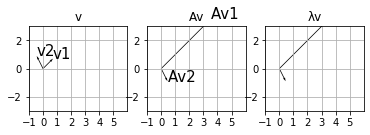

In [39]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3,2],[4,1]])

# 고유벡터와 고유값 계산
eigenvalue, eigenvector = np.linalg.eig(A)

eigenvector1 = eigenvector[:, 0]
eigenvector2 = eigenvector[:, 1]
eigenvalue1 = eigenvalue[0]
eigenvalue2 = eigenvalue[1]

# 1x3 크기의 subplot 생성
f ,ax = plt.subplots(1,3)

# 서브플롯 상단에 텍스트 추가 
ax[0].title.set_text('v') 
ax[1].title.set_text('Av') 
ax[2].title.set_text('λv')

# Av, λv 계산
# colab 과 내 jupyter 에선 round로 소수점을 안정해주면 에러가 발생해 소수점을 나누어 주었다.
s1 = np.dot(A, eigenvector1)
s2 = np.dot(A, eigenvector2)

w1 = np.dot(eigenvector1, eigenvalue1)
w2 = np.dot(eigenvector2, eigenvalue2)

# 벡터표시

ax[0].quiver(0,0, round(eigenvector1[0],6), round(eigenvector1[1],6), angles='xy', scale_units='xy', scale=1, color='black')
ax[0].quiver(0,0, round(eigenvector2[0],6), round(eigenvector2[1],6), angles='xy', scale_units='xy', scale=1, color='black')
ax[0].text(eigenvector1[0],eigenvector1[1], 'v1' ,size = 15)
ax[0].text(eigenvector2[0],eigenvector2[1], 'v2' ,size = 15)

ax[1].quiver(0,0, round(s1[0],6), round(s1[1],6), angles='xy', scale_units='xy', scale=1, color='black')
ax[1].quiver(0,0, round(s2[0],6), round(s2[1],6), angles='xy', scale_units='xy', scale=1, color='black')
ax[1].text(s1[0],s1[1], 'Av1' ,size = 15)
ax[1].text(s2[0],s2[1], 'Av2' ,size = 15)

ax[2].quiver(0,0, round(w1[0],6), round(w1[1],6), angles='xy', scale_units='xy', scale=1, color='black')
ax[2].quiver(0,0, round(w2[0],6), round(w2[1],6), angles='xy', scale_units='xy', scale=1, color='black')


# 그리드 생성

start_x = -1
end_x = 6
start_y = -3
end_y = 3

for i in range(3) :
    ax[i].axis([start_x, end_x, start_y, end_y])
    ax[i].set_xticks(range(start_x, end_x))
    ax[i].grid(True)
    ax[i].set_aspect('equal', adjustable='box')

__선형변환(linear transformation)__ 은 선형 결합을 보존하는 두 벡터 공간 사이의 함수 이다. 영벡터가 아닌 벡터를 (Rotaion), 확대/축소(Scaling) 전단 매핑(shear mapping) 하더라도 변환 전후의 벡터의 방향이 평행하고 확대 축소만 된다면 벡터는 선형 변환의 고유벡터라 하며, 확대/축소 되는 크기를 고유값이라고 한다.  

벡터 v에 행렬 A를 곱하여 벡터 b를 얻는 것은 입력 벡터인 v에 선형변환을 적용했다고 한다.